In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df1=pd.read_csv('CSUSHPINSA.csv')

In [72]:
df1

,DATE,CSUSHPINSA
0,1987-01-01,63.735
1,1987-02-01,64.134
2,1987-03-01,64.470
3,1987-04-01,64.973
4,1987-05-01,65.547
...,...,...
433,2023-02-01,293.341
434,2023-03-01,297.127
435,2023-04-01,301.457
436,2023-05-01,305.402


In [73]:
df1.head()

,DATE,CSUSHPINSA
0,1987-01-01,63.735
1,1987-02-01,64.134
2,1987-03-01,64.470
3,1987-04-01,64.973
4,1987-05-01,65.547


In [74]:
df1.tail()

,DATE,CSUSHPINSA
433,2023-02-01,293.341
434,2023-03-01,297.127
435,2023-04-01,301.457
436,2023-05-01,305.402
437,2023-06-01,308.254


In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        438 non-null    object 
 1   CSUSHPINSA  438 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.0+ KB


#convert data from Oject to Datatime

In [76]:
df1['DATE']=pd.to_datetime(df1['DATE'])

In [77]:
df1.dtypes

DATE          datetime64[ns]
CSUSHPINSA           float64
dtype: object

In [78]:
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
433    False
434    False
435    False
436    False
437    False
Length: 438, dtype: bool

In [79]:
# Checking for missing values if any
df1.isnull().sum()

DATE          0
CSUSHPINSA    0
dtype: int64

In [80]:
df1.describe()

,CSUSHPINSA
count,438.000000
mean,140.764484
std,59.825993
min,63.735000
25%,81.729000
50%,140.876500
75%,178.687750
max,308.323000


In [81]:
df2=pd.read_csv('MORTGAGE30US.csv')

In [82]:
df2

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29
...,...,...
2733,2023-08-17,7.09
2734,2023-08-24,7.23
2735,2023-08-31,7.18
2736,2023-09-07,7.12


In [83]:
df2.head()

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [84]:
df2.tail()

,DATE,MORTGAGE30US
2733,2023-08-17,7.09
2734,2023-08-24,7.23
2735,2023-08-31,7.18
2736,2023-09-07,7.12
2737,2023-09-14,7.18


In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          2738 non-null   object 
 1   MORTGAGE30US  2738 non-null   float64
dtypes: float64(1), object(1)
memory usage: 42.9+ KB


In [86]:
df2['DATE']=pd.to_datetime(df2['DATE'])

In [87]:
df2.dtypes

DATE            datetime64[ns]
MORTGAGE30US           float64
dtype: object

In [88]:
df2.isnull().sum()

DATE            0
MORTGAGE30US    0
dtype: int64

In [89]:
df2.describe()

,MORTGAGE30US
count,2738.000000
mean,7.739638
std,3.258074
min,2.650000
25%,5.140000
50%,7.410000
75%,9.480000
max,18.630000


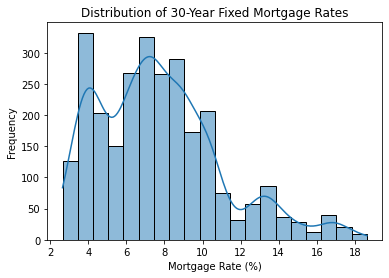

In [90]:
sns.histplot(data=df2, x='MORTGAGE30US', bins=20, kde=True)
plt.title('Distribution of 30-Year Fixed Mortgage Rates')
plt.xlabel('Mortgage Rate (%)')
plt.ylabel('Frequency')
plt.show()

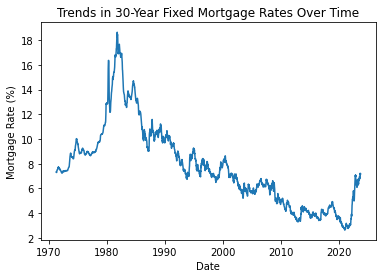

In [91]:
sns.lineplot(data=df2, x='DATE', y='MORTGAGE30US')
plt.title('Trends in 30-Year Fixed Mortgage Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Mortgage Rate (%)')
plt.show()

In [92]:
merged_data= pd.merge(df1, df2, on='DATE', how='inner')

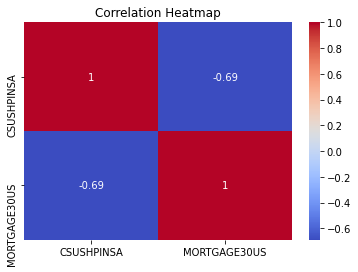

In [93]:
correlation_matrix = merged_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [94]:
import statsmodels.api as sm
# Define your dependent variable (Y) and independent variable (X)
Y = merged_data['CSUSHPINSA']
X = merged_data['MORTGAGE30US']

# Add a constant term to the independent variable (X) for the intercept
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(Y, X).fit()

# Print a summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             CSUSHPINSA   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     51.64
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           1.56e-09
Time:                        22:37:57   Log-Likelihood:                -308.38
No. Observations:                  59   AIC:                             620.8
Df Residuals:                      57   BIC:                             624.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          273.6700     19.061     14.358   

#the regression model indicates that changes in mortgage rates have a statistically significant impact on home prices.Specifically, as mortgage rates increase, home prices tend to decrease, with an estimated decrease of approximately $20,343.4 for every one-unit increase in mortgage rates

In [138]:
df1.rename(columns ={'CSUSHPINSA':'Home Prices'}, inplace=True)
df2.rename(columns={'MORTGAGE30US':'Mortage_rates'},inplace=True)

In [139]:
df1

,DATE,Home Prices
0,1987-01-01,63.735
1,1987-02-01,64.134
2,1987-03-01,64.470
3,1987-04-01,64.973
4,1987-05-01,65.547
...,...,...
433,2023-02-01,293.341
434,2023-03-01,297.127
435,2023-04-01,301.457
436,2023-05-01,305.402


In [140]:
df2

,DATE,Mortage_rates
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29
...,...,...
2733,2023-08-17,7.09
2734,2023-08-24,7.23
2735,2023-08-31,7.18
2736,2023-09-07,7.12


In [141]:
df3=pd.read_excel('Home Price Prediction Dataset.xlsx')

In [142]:
df3

,Period,UNEMP,CONST,Months of Supply,Mortgage Rate,Permits-Number,Permits-Valuation,Housing Starts,Consumption,Disposable Income,Savings,Fed Funds Rate,Homes for Sale,Homes Sold
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,5.4,NaN,7.0,9.8950,NaN,7567.597,1551.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-02-01,5.3,NaN,7.6,10.1975,NaN,6583.558,1437.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-03-01,5.2,NaN,7.8,10.2680,NaN,8752.084,1289.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-04-01,5.4,NaN,8.3,10.3700,NaN,8478.328,1248.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2020-08-01,8.4,615396.0,3.5,2.9350,1476.0,26393.025,1373.0,14397.2,15693.3,2616.0,0.095161,283.0,977.0
369,2020-09-01,7.9,619090.0,3.5,2.8900,1545.0,27855.548,1437.0,14582.7,15785.9,2546.0,0.090000,284.0,965.0
370,2020-10-01,6.9,637138.0,3.6,2.8340,1544.0,28535.285,1528.0,14630.1,15664.8,2371.6,0.090000,281.0,945.0
371,2020-11-01,6.7,NaN,4.1,2.7650,1635.0,24993.872,1547.0,14566.8,15467.4,2220.4,0.086333,287.0,841.0


In [143]:
df3.head()

,Period,UNEMP,CONST,Months of Supply,Mortgage Rate,Permits-Number,Permits-Valuation,Housing Starts,Consumption,Disposable Income,Savings,Fed Funds Rate,Homes for Sale,Homes Sold
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,5.4,NaN,7.0,9.8950,NaN,7567.597,1551.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-02-01,5.3,NaN,7.6,10.1975,NaN,6583.558,1437.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-03-01,5.2,NaN,7.8,10.2680,NaN,8752.084,1289.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-04-01,5.4,NaN,8.3,10.3700,NaN,8478.328,1248.0,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
df3.tail()

,Period,UNEMP,CONST,Months of Supply,Mortgage Rate,Permits-Number,Permits-Valuation,Housing Starts,Consumption,Disposable Income,Savings,Fed Funds Rate,Homes for Sale,Homes Sold
368,2020-08-01,8.4,615396.0,3.5,2.935,1476.0,26393.025,1373.0,14397.2,15693.3,2616.0,0.095161,283.0,977.0
369,2020-09-01,7.9,619090.0,3.5,2.890,1545.0,27855.548,1437.0,14582.7,15785.9,2546.0,0.090000,284.0,965.0
370,2020-10-01,6.9,637138.0,3.6,2.834,1544.0,28535.285,1528.0,14630.1,15664.8,2371.6,0.090000,281.0,945.0
371,2020-11-01,6.7,NaN,4.1,2.765,1635.0,24993.872,1547.0,14566.8,15467.4,2220.4,0.086333,287.0,841.0
372,2020-12-01,NaN,NaN,NaN,2.684,NaN,NaN,NaN,NaN,NaN,NaN,0.090000,NaN,NaN


In [145]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Period             372 non-null    datetime64[ns]
 1   UNEMP              371 non-null    float64       
 2   CONST              250 non-null    float64       
 3   Months of Supply   371 non-null    float64       
 4   Mortgage Rate      372 non-null    float64       
 5   Permits-Number     299 non-null    float64       
 6   Permits-Valuation  371 non-null    float64       
 7   Housing Starts     371 non-null    float64       
 8   Consumption        251 non-null    float64       
 9   Disposable Income  251 non-null    float64       
 10  Savings            251 non-null    float64       
 11  Fed Funds Rate     252 non-null    float64       
 12  Homes for Sale     251 non-null    float64       
 13  Homes Sold         251 non-null    float64       
dtypes: datetim

In [146]:
df3.rename(columns={'Period':'DATE'},inplace=True)

In [147]:
df3

,DATE,UNEMP,CONST,Months of Supply,Mortgage Rate,Permits-Number,Permits-Valuation,Housing Starts,Consumption,Disposable Income,Savings,Fed Funds Rate,Homes for Sale,Homes Sold
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,5.4,NaN,7.0,9.8950,NaN,7567.597,1551.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-02-01,5.3,NaN,7.6,10.1975,NaN,6583.558,1437.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-03-01,5.2,NaN,7.8,10.2680,NaN,8752.084,1289.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-04-01,5.4,NaN,8.3,10.3700,NaN,8478.328,1248.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2020-08-01,8.4,615396.0,3.5,2.9350,1476.0,26393.025,1373.0,14397.2,15693.3,2616.0,0.095161,283.0,977.0
369,2020-09-01,7.9,619090.0,3.5,2.8900,1545.0,27855.548,1437.0,14582.7,15785.9,2546.0,0.090000,284.0,965.0
370,2020-10-01,6.9,637138.0,3.6,2.8340,1544.0,28535.285,1528.0,14630.1,15664.8,2371.6,0.090000,281.0,945.0
371,2020-11-01,6.7,NaN,4.1,2.7650,1635.0,24993.872,1547.0,14566.8,15467.4,2220.4,0.086333,287.0,841.0


In [148]:
df3.describe()

,UNEMP,CONST,Months of Supply,Mortgage Rate,Permits-Number,Permits-Valuation,Housing Starts,Consumption,Disposable Income,Savings,Fed Funds Rate,Homes for Sale,Homes Sold
count,371.000000,250.000000,371.000000,372.000000,299.000000,371.000000,371.000000,251.000000,251.000000,251.000000,252.000000,251.000000,251.000000
mean,5.912129,428859.360000,5.720216,6.068938,1353.414716,15296.481571,1303.221024,10494.132271,12123.450996,818.369323,1.716926,310.019920,697.844622
std,1.739832,122721.914363,1.751631,1.876129,439.988234,6388.851137,399.019413,2353.486378,1712.412383,623.919634,1.898628,113.227398,299.572702
min,3.500000,236512.000000,3.500000,2.684000,513.000000,4096.211000,478.000000,6535.300000,9307.100000,202.200000,0.049000,142.000000,270.000000
25%,4.600000,340081.750000,4.300000,4.292500,1047.500000,9681.043000,1053.500000,8606.700000,10770.350000,432.150000,0.144833,217.500000,438.000000
50%,5.500000,415920.000000,5.300000,6.103750,1387.000000,14561.311000,1288.000000,10151.400000,11875.800000,756.800000,1.034516,302.000000,627.000000
75%,6.850000,537308.750000,6.500000,7.483750,1655.500000,19944.262000,1567.500000,12383.500000,13431.550000,1021.300000,2.400726,351.000000,940.000000
max,14.700000,678562.000000,12.200000,10.477500,2263.000000,32303.090000,2273.000000,14880.500000,17287.100000,6413.700000,6.544516,570.000000,1389.000000


In [149]:
df3.isnull().sum()

DATE                   1
UNEMP                  2
CONST                123
Months of Supply       2
Mortgage Rate          1
Permits-Number        74
Permits-Valuation      2
Housing Starts         2
Consumption          122
Disposable Income    122
Savings              122
Fed Funds Rate       121
Homes for Sale       122
Homes Sold           122
dtype: int64

In [150]:
numeric_columns = ['UNEMP', 'CONST', 'Months of Supply', 'Mortgage Rate', 'Permits-Number', 'Permits-Valuation',
                   'Housing Starts', 'Consumption', 'Disposable Income', 'Savings', 'Fed Funds Rate',
                   'Homes for Sale', 'Homes Sold']

In [151]:
df3[numeric_columns] = df3[numeric_columns].fillna(df3[numeric_columns].mean())


In [152]:
threshold_missing_values = 3

In [153]:
df_cleaned = df3[df3.isnull().sum(axis=1) <= threshold_missing_values]

In [154]:
df_cleaned 

,DATE,UNEMP,CONST,Months of Supply,Mortgage Rate,Permits-Number,Permits-Valuation,Housing Starts,Consumption,Disposable Income,Savings,Fed Funds Rate,Homes for Sale,Homes Sold
0,NaT,5.912129,428859.36,5.720216,6.068938,1353.414716,15296.481571,1303.221024,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
1,1990-01-01,5.400000,428859.36,7.000000,9.895000,1353.414716,7567.597000,1551.000000,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
2,1990-02-01,5.300000,428859.36,7.600000,10.197500,1353.414716,6583.558000,1437.000000,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
3,1990-03-01,5.200000,428859.36,7.800000,10.268000,1353.414716,8752.084000,1289.000000,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
4,1990-04-01,5.400000,428859.36,8.300000,10.370000,1353.414716,8478.328000,1248.000000,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2020-08-01,8.400000,615396.00,3.500000,2.935000,1476.000000,26393.025000,1373.000000,14397.200000,15693.300000,2616.000000,0.095161,283.00000,977.000000
369,2020-09-01,7.900000,619090.00,3.500000,2.890000,1545.000000,27855.548000,1437.000000,14582.700000,15785.900000,2546.000000,0.090000,284.00000,965.000000
370,2020-10-01,6.900000,637138.00,3.600000,2.834000,1544.000000,28535.285000,1528.000000,14630.100000,15664.800000,2371.600000,0.090000,281.00000,945.000000
371,2020-11-01,6.700000,428859.36,4.100000,2.765000,1635.000000,24993.872000,1547.000000,14566.800000,15467.400000,2220.400000,0.086333,287.00000,841.000000


In [155]:
df3.isnull().sum()

DATE                 1
UNEMP                0
CONST                0
Months of Supply     0
Mortgage Rate        0
Permits-Number       0
Permits-Valuation    0
Housing Starts       0
Consumption          0
Disposable Income    0
Savings              0
Fed Funds Rate       0
Homes for Sale       0
Homes Sold           0
dtype: int64

In [156]:
default_date = df3['DATE'].min()  # Use the earliest available date in your dataset
df3['DATE'].fillna(default_date, inplace=True)

In [157]:
df3.isnull().sum()

DATE                 0
UNEMP                0
CONST                0
Months of Supply     0
Mortgage Rate        0
Permits-Number       0
Permits-Valuation    0
Housing Starts       0
Consumption          0
Disposable Income    0
Savings              0
Fed Funds Rate       0
Homes for Sale       0
Homes Sold           0
dtype: int64

In [158]:
df3

,DATE,UNEMP,CONST,Months of Supply,Mortgage Rate,Permits-Number,Permits-Valuation,Housing Starts,Consumption,Disposable Income,Savings,Fed Funds Rate,Homes for Sale,Homes Sold
0,1990-01-01,5.912129,428859.36,5.720216,6.068938,1353.414716,15296.481571,1303.221024,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
1,1990-01-01,5.400000,428859.36,7.000000,9.895000,1353.414716,7567.597000,1551.000000,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
2,1990-02-01,5.300000,428859.36,7.600000,10.197500,1353.414716,6583.558000,1437.000000,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
3,1990-03-01,5.200000,428859.36,7.800000,10.268000,1353.414716,8752.084000,1289.000000,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
4,1990-04-01,5.400000,428859.36,8.300000,10.370000,1353.414716,8478.328000,1248.000000,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2020-08-01,8.400000,615396.00,3.500000,2.935000,1476.000000,26393.025000,1373.000000,14397.200000,15693.300000,2616.000000,0.095161,283.00000,977.000000
369,2020-09-01,7.900000,619090.00,3.500000,2.890000,1545.000000,27855.548000,1437.000000,14582.700000,15785.900000,2546.000000,0.090000,284.00000,965.000000
370,2020-10-01,6.900000,637138.00,3.600000,2.834000,1544.000000,28535.285000,1528.000000,14630.100000,15664.800000,2371.600000,0.090000,281.00000,945.000000
371,2020-11-01,6.700000,428859.36,4.100000,2.765000,1635.000000,24993.872000,1547.000000,14566.800000,15467.400000,2220.400000,0.086333,287.00000,841.000000


In [159]:
df3.head()

,DATE,UNEMP,CONST,Months of Supply,Mortgage Rate,Permits-Number,Permits-Valuation,Housing Starts,Consumption,Disposable Income,Savings,Fed Funds Rate,Homes for Sale,Homes Sold
0,1990-01-01,5.912129,428859.36,5.720216,6.068938,1353.414716,15296.481571,1303.221024,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
1,1990-01-01,5.400000,428859.36,7.000000,9.895000,1353.414716,7567.597000,1551.000000,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
2,1990-02-01,5.300000,428859.36,7.600000,10.197500,1353.414716,6583.558000,1437.000000,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
3,1990-03-01,5.200000,428859.36,7.800000,10.268000,1353.414716,8752.084000,1289.000000,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
4,1990-04-01,5.400000,428859.36,8.300000,10.370000,1353.414716,8478.328000,1248.000000,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622


In [160]:
df3.tail()

,DATE,UNEMP,CONST,Months of Supply,Mortgage Rate,Permits-Number,Permits-Valuation,Housing Starts,Consumption,Disposable Income,Savings,Fed Funds Rate,Homes for Sale,Homes Sold
368,2020-08-01,8.400000,615396.00,3.500000,2.935,1476.000000,26393.025000,1373.000000,14397.200000,15693.300000,2616.000000,0.095161,283.00000,977.000000
369,2020-09-01,7.900000,619090.00,3.500000,2.890,1545.000000,27855.548000,1437.000000,14582.700000,15785.900000,2546.000000,0.090000,284.00000,965.000000
370,2020-10-01,6.900000,637138.00,3.600000,2.834,1544.000000,28535.285000,1528.000000,14630.100000,15664.800000,2371.600000,0.090000,281.00000,945.000000
371,2020-11-01,6.700000,428859.36,4.100000,2.765,1635.000000,24993.872000,1547.000000,14566.800000,15467.400000,2220.400000,0.086333,287.00000,841.000000
372,2020-12-01,5.912129,428859.36,5.720216,2.684,1353.414716,15296.481571,1303.221024,10494.132271,12123.450996,818.369323,0.090000,310.01992,697.844622


In [161]:
df3.shape

(373, 14)

In [162]:
columns_of_interest = ['UNEMP', 'Mortgage Rate', 'Fed Funds Rate', 'Consumption', 'Disposable Income', 'Savings','Home Prices']

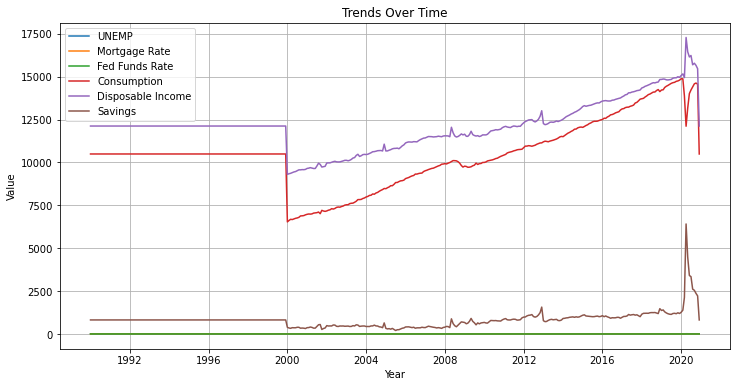

In [163]:
plt.figure(figsize=(12, 6))
for column in columns_of_interest[:-1]:  # Exclude 'CSUSHPINSA' from plotting
    plt.plot(df3['DATE'], df3[column], label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trends Over Time')
plt.legend()
plt.grid(True)

In [164]:
correlation_matrix = df3[columns_of_interest].corr()

KeyError: "['Home Prices'] not in index"

In [165]:
correlation_matrix

,CSUSHPINSA,MORTGAGE30US
CSUSHPINSA,1.000000,-0.689451
MORTGAGE30US,-0.689451,1.000000


In [166]:
merged_data= pd.merge(df1, df2, on='DATE', how='inner')

In [167]:
Final_dataset = pd.merge(merged_data,df3,on='DATE', how='inner')


In [168]:
Final_dataset

,DATE,Home Prices,Mortage_rates,UNEMP,CONST,Months of Supply,Mortgage Rate,Permits-Number,Permits-Valuation,Housing Starts,Consumption,Disposable Income,Savings,Fed Funds Rate,Homes for Sale,Homes Sold
0,1990-06-01,77.505,10.29,5.2,428859.36,7.9,10.1640,1353.414716,8897.658,1177.0,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
1,1991-02-01,75.248,9.56,6.6,428859.36,7.9,9.3650,1353.414716,4426.160,965.0,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
2,1991-03-01,75.136,9.40,6.8,428859.36,7.3,9.5000,1353.414716,6666.580,921.0,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
3,1991-11-01,76.029,8.78,7.0,428859.36,6.2,8.7120,1353.414716,5545.070,1103.0,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
4,1992-05-01,76.397,8.84,7.6,428859.36,6.0,8.6720,1353.414716,8593.133,1214.0,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
5,1993-10-01,78.171,6.89,6.8,428859.36,5.0,6.8340,1353.414716,9493.884,1392.0,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
6,1994-04-01,78.700,8.04,6.4,428859.36,5.2,8.3160,1353.414716,11545.968,1465.0,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
7,1994-07-01,80.061,8.57,6.1,428859.36,6.3,8.6140,1353.414716,10385.244,1439.0,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
8,1995-09-01,81.738,7.76,5.6,428859.36,6.3,7.6360,1353.414716,11091.270,1369.0,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
9,1995-12-01,81.513,7.33,5.6,428859.36,6.4,7.2000,1353.414716,8776.115,1431.0,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622


In [169]:
Final_dataset.head()

,DATE,Home Prices,Mortage_rates,UNEMP,CONST,Months of Supply,Mortgage Rate,Permits-Number,Permits-Valuation,Housing Starts,Consumption,Disposable Income,Savings,Fed Funds Rate,Homes for Sale,Homes Sold
0,1990-06-01,77.505,10.29,5.2,428859.36,7.9,10.164,1353.414716,8897.658,1177.0,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
1,1991-02-01,75.248,9.56,6.6,428859.36,7.9,9.365,1353.414716,4426.160,965.0,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
2,1991-03-01,75.136,9.40,6.8,428859.36,7.3,9.500,1353.414716,6666.580,921.0,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
3,1991-11-01,76.029,8.78,7.0,428859.36,6.2,8.712,1353.414716,5545.070,1103.0,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622
4,1992-05-01,76.397,8.84,7.6,428859.36,6.0,8.672,1353.414716,8593.133,1214.0,10494.132271,12123.450996,818.369323,1.716926,310.01992,697.844622


In [170]:
Final_dataset.tail()

,DATE,Home Prices,Mortage_rates,UNEMP,CONST,Months of Supply,Mortgage Rate,Permits-Number,Permits-Valuation,Housing Starts,Consumption,Disposable Income,Savings,Fed Funds Rate,Homes for Sale,Homes Sold
44,2018-02-01,196.909,4.22,4.1,585549.0,5.6,4.330,1332.0,19126.092,1288.0,13738.4,14379.4,1204.1,1.417500,295.0,637.0
45,2018-03-01,198.578,4.43,4.0,576915.0,5.4,4.444,1415.0,24164.751,1335.0,13811.8,14437.8,1208.5,1.506129,293.0,662.0
46,2018-11-01,205.119,4.83,3.7,534182.0,6.5,4.866,1319.0,19855.447,1204.0,14249.7,14688.9,1189.6,2.197667,341.0,614.0
47,2019-08-01,211.713,3.75,3.7,552508.0,5.5,3.616,1471.0,25201.615,1377.0,14650.9,14912.4,1194.5,2.125806,325.0,706.0
48,2020-10-01,229.838,2.88,6.9,637138.0,3.6,2.834,1544.0,28535.285,1528.0,14630.1,15664.8,2371.6,0.090000,281.0,945.0


In [171]:
Final_dataset.shape

(49, 16)

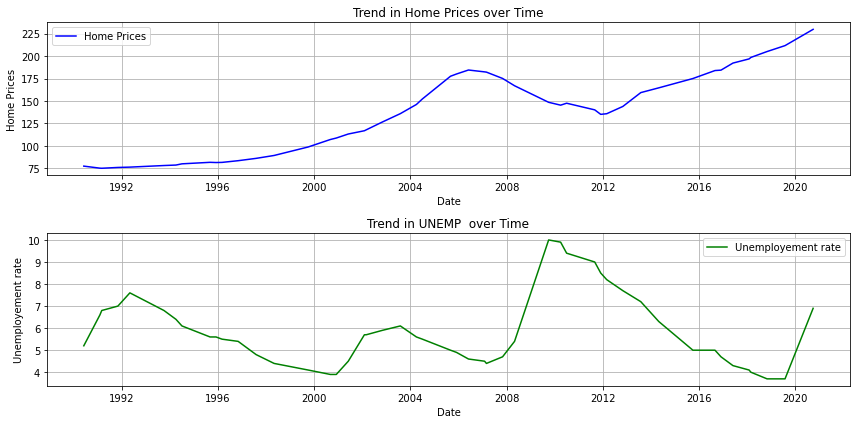

In [172]:
plt.figure(figsize=(12, 6))

# Plot Home Prices
plt.subplot(2, 1, 1)
plt.plot(Final_dataset['DATE'], Final_dataset['Home Prices'], label='Home Prices', color='blue')
plt.title('Trend in Home Prices over Time')
plt.xlabel('Date')
plt.ylabel('Home Prices')
plt.grid(True)
plt.legend()

# Plot Mortgage Rates
plt.subplot(2, 1, 2)
plt.plot(Final_dataset['DATE'], Final_dataset['UNEMP'], label='Unemployement rate', color='green')
plt.title('Trend in UNEMP  over Time')
plt.xlabel('Date')
plt.ylabel('Unemployement rate')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [173]:
columns_to_drop = ['Homes Sold','Mortgage Rate']
Final_dataset = Final_dataset.drop(columns=columns_to_drop)

In [174]:
Final_dataset

,DATE,Home Prices,Mortage_rates,UNEMP,CONST,Months of Supply,Permits-Number,Permits-Valuation,Housing Starts,Consumption,Disposable Income,Savings,Fed Funds Rate,Homes for Sale
0,1990-06-01,77.505,10.29,5.2,428859.36,7.9,1353.414716,8897.658,1177.0,10494.132271,12123.450996,818.369323,1.716926,310.01992
1,1991-02-01,75.248,9.56,6.6,428859.36,7.9,1353.414716,4426.160,965.0,10494.132271,12123.450996,818.369323,1.716926,310.01992
2,1991-03-01,75.136,9.40,6.8,428859.36,7.3,1353.414716,6666.580,921.0,10494.132271,12123.450996,818.369323,1.716926,310.01992
3,1991-11-01,76.029,8.78,7.0,428859.36,6.2,1353.414716,5545.070,1103.0,10494.132271,12123.450996,818.369323,1.716926,310.01992
4,1992-05-01,76.397,8.84,7.6,428859.36,6.0,1353.414716,8593.133,1214.0,10494.132271,12123.450996,818.369323,1.716926,310.01992
5,1993-10-01,78.171,6.89,6.8,428859.36,5.0,1353.414716,9493.884,1392.0,10494.132271,12123.450996,818.369323,1.716926,310.01992
6,1994-04-01,78.700,8.04,6.4,428859.36,5.2,1353.414716,11545.968,1465.0,10494.132271,12123.450996,818.369323,1.716926,310.01992
7,1994-07-01,80.061,8.57,6.1,428859.36,6.3,1353.414716,10385.244,1439.0,10494.132271,12123.450996,818.369323,1.716926,310.01992
8,1995-09-01,81.738,7.76,5.6,428859.36,6.3,1353.414716,11091.270,1369.0,10494.132271,12123.450996,818.369323,1.716926,310.01992
9,1995-12-01,81.513,7.33,5.6,428859.36,6.4,1353.414716,8776.115,1431.0,10494.132271,12123.450996,818.369323,1.716926,310.01992


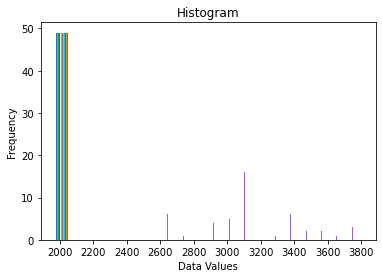

In [133]:
plt.hist(Final_dataset, bins=20)  # Adjust the number of bins as needed
plt.title('Histogram')
plt.xlabel('Data Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [135]:
Final_dataset.corr()


,Home Prices,Mortage_rates,UNEMP,CONST,Months of Supply,Permits-Number,Permits-Valuation,Housing Starts,Consumption,Disposable Income,Savings,Fed Funds Rate,Homes for Sale
Home Prices,1.000000,-0.806815,-0.202370,0.441927,0.055971,0.014301,0.732221,0.012885,0.443284,0.444685,0.277014,-0.010274,0.188604
Mortage_rates,-0.806815,1.000000,-0.153124,-0.024868,0.138773,0.327317,-0.455512,0.274852,-0.496725,-0.491020,-0.442168,0.421745,0.322740
UNEMP,-0.202370,-0.153124,1.000000,-0.658279,0.178755,-0.646893,-0.520083,-0.637102,-0.044383,-0.052339,0.135384,-0.587379,-0.532788
CONST,0.441927,-0.024868,-0.658279,1.000000,-0.121140,0.719798,0.734615,0.668395,0.274376,0.302145,0.112501,0.313740,0.656490
Months of Supply,0.055971,0.138773,0.178755,-0.121140,1.000000,-0.440737,-0.342223,-0.496196,0.168828,0.147119,-0.048220,0.066316,0.260302
Permits-Number,0.014301,0.327317,-0.646893,0.719798,-0.440737,1.000000,0.609736,0.965983,-0.388487,-0.352626,-0.367760,0.503358,0.672299
Permits-Valuation,0.732221,-0.455512,-0.520083,0.734615,-0.342223,0.609736,1.000000,0.614126,0.111095,0.134081,0.032006,0.199253,0.448646
Housing Starts,0.012885,0.274852,-0.637102,0.668395,-0.496196,0.965983,0.614126,1.000000,-0.411305,-0.375874,-0.369925,0.491198,0.640032
Consumption,0.443284,-0.496725,-0.044383,0.274376,0.168828,-0.388487,0.111095,-0.411305,1.000000,0.994443,0.831468,-0.463620,-0.304895
Disposable Income,0.444685,-0.491020,-0.052339,0.302145,0.147119,-0.352626,0.134081,-0.375874,0.994443,1.000000,0.871839,-0.469202,-0.289147


In [175]:
feature={'Mortage_rates', 'UNEMP'}
outcome={'Home Prices'}
x=Final_dataset[feature]
y=Final_dataset[outcome]


In [176]:
x

,UNEMP,Mortage_rates
0,5.2,10.29
1,6.6,9.56
2,6.8,9.40
3,7.0,8.78
4,7.6,8.84
5,6.8,6.89
6,6.4,8.04
7,6.1,8.57
8,5.6,7.76
9,5.6,7.33


In [177]:
y

,Home Prices
0,77.505
1,75.248
2,75.136
3,76.029
4,76.397
5,78.171
6,78.700
7,80.061
8,81.738
9,81.513


# Split x & y into training and testing sets

In [179]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [182]:
#create model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [183]:
y_pred=lr.predict(x_test)
y_pred


array([[143.24686232],
       [ 60.15058065],
       [135.09384565],
       [141.35770584],
       [122.46219296],
       [179.59939389],
       [149.56041481],
       [193.76326153],
       [ 79.6249762 ],
       [110.64552371]])

In [185]:
y_test

,Home Prices
29,175.162
4,76.397
26,184.547
30,167.021
32,145.404
37,143.962
34,140.170
40,175.051
7,80.061
10,81.665


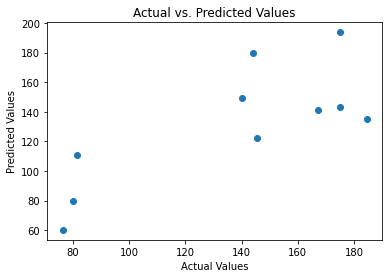

In [194]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

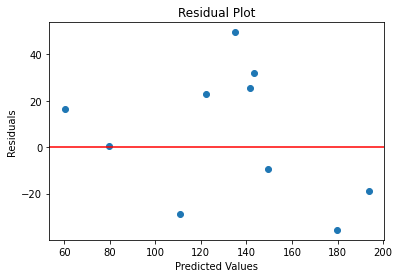

In [195]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

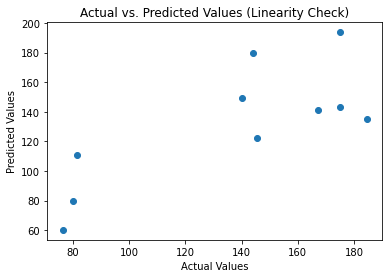

In [196]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linearity Check)")
plt.show()

In [190]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, y_pred)

In [191]:
mse_lr

746.1481144191714